# Importing necessary libraries

In [175]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import decode_image
import numpy as np
import matplotlib.pyplot as plt

# Tensor Basics

## Initializing a tensor

### Creating a tensor directly from data

In [123]:
data = [ [1, 2], [3, 4] ]
x_data = torch.tensor(data)

In [124]:
x_data

tensor([[1, 2],
        [3, 4]])


### Creating a tensor from a NumPy array

In [125]:
np_array = np.array(data) # Taken from previous cell
x_np = torch.from_numpy(np_array)

In [126]:
x_np

tensor([[1, 2],
        [3, 4]])

### Creating a tensor from another tensor

Tensors created from other tensors retain the **shape** and **datatype** of tha original tensor, unless explicity overridden

In [127]:
x_ones = torch.ones_like(x_data) # Retains the properties of x_data
x_rand = torch.rand_like(x_data, dtype=torch.float) # Override the datatype of x_data using 'dtype' arg

In [128]:
x_ones

tensor([[1, 1],
        [1, 1]])

In [129]:
x_rand

tensor([[0.3004, 0.3322],
        [0.1191, 0.3209]])

### Creating a tensor from random or constant values

**shape** is a tuple of tensor dimensions and determines the dimensionality of tensors in some functions

In [130]:
shape = (2, 3,) # Common practice to include trailing commas to make editing easier
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

In [131]:
rand_tensor

tensor([[0.4184, 0.7936, 0.6720],
        [0.2501, 0.7241, 0.4333]])

In [132]:
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [133]:
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

## Attributes of a Tensor

Tensor attributes are:
- shape
- datatype
- device (on which they are stored)

In [134]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor Operations

There are over [1200 operations](https://docs.pytorch.org/docs/stable/torch.html) one can perform on Tensors.

By default, tensors are created on the CPU. Copying large tensors across devices can be expensive in terms of time and memory, but can be done using .to() after checking for accelerator availability using torch.accelerator.is_available()

## Standard operations (indexing, slicing, etc.)

In [135]:
tensor = torch.rand(4, 4)
tensor

tensor([[0.7898, 0.4887, 0.1427, 0.5055],
        [0.6349, 0.5992, 0.1430, 0.4997],
        [0.6399, 0.7235, 0.9240, 0.8703],
        [0.8515, 0.3718, 0.2119, 0.8705]])

In [136]:
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}") # ... is used to represent all remaining dimensions

# Modifying an entire column's values
tensor[:, 1] = 3 # We modify the first column across all the rows
tensor

First row: tensor([0.7898, 0.4887, 0.1427, 0.5055])
First column: tensor([0.7898, 0.6349, 0.6399, 0.8515])
Last column: tensor([0.5055, 0.4997, 0.8703, 0.8705])


tensor([[0.7898, 3.0000, 0.1427, 0.5055],
        [0.6349, 3.0000, 0.1430, 0.4997],
        [0.6399, 3.0000, 0.9240, 0.8703],
        [0.8515, 3.0000, 0.2119, 0.8705]])

In [137]:
# A little more about '...'
shape = (3, 3, 3, )
n_tensor = torch.rand(shape)
print(n_tensor.shape)
n_tensor

torch.Size([3, 3, 3])


tensor([[[0.3347, 0.6907, 0.7338],
         [0.2613, 0.9283, 0.3374],
         [0.8587, 0.2528, 0.3943]],

        [[0.8303, 0.6093, 0.1812],
         [0.5846, 0.2494, 0.2850],
         [0.1012, 0.6843, 0.8281]],

        [[0.5939, 0.0294, 0.7801],
         [0.6515, 0.7517, 0.9103],
         [0.7654, 0.5371, 0.6330]]])

In [138]:
print(f"First row across the entire tensor:\n\n {n_tensor[:, 0, :]}")
print(f"\n\nThe first layer of the tensor:\n\n {n_tensor[0, :, :]}")

First row across the entire tensor:

 tensor([[0.3347, 0.6907, 0.7338],
        [0.8303, 0.6093, 0.1812],
        [0.5939, 0.0294, 0.7801]])


The first layer of the tensor:

 tensor([[0.3347, 0.6907, 0.7338],
        [0.2613, 0.9283, 0.3374],
        [0.8587, 0.2528, 0.3943]])


We can simplify the retrieval of the first layer of the tensor by using '...'

This currently doesn't seem like it's doing much, but when you're working with n-dimnensional tensors then retrieving the first layer (or the first of anything) would be a tedious process if you had to manually enter ':' for each one

In [139]:
n_tensor[0, ...] # This returns the same thing as n_tensor[0, :, :]

tensor([[0.3347, 0.6907, 0.7338],
        [0.2613, 0.9283, 0.3374],
        [0.8587, 0.2528, 0.3943]])

## Joining Tensors

In [140]:
tensor

tensor([[0.7898, 3.0000, 0.1427, 0.5055],
        [0.6349, 3.0000, 0.1430, 0.4997],
        [0.6399, 3.0000, 0.9240, 0.8703],
        [0.8515, 3.0000, 0.2119, 0.8705]])

In [141]:
cc_tensor = torch.cat([tensor, tensor])
cc_tensor

tensor([[0.7898, 3.0000, 0.1427, 0.5055],
        [0.6349, 3.0000, 0.1430, 0.4997],
        [0.6399, 3.0000, 0.9240, 0.8703],
        [0.8515, 3.0000, 0.2119, 0.8705],
        [0.7898, 3.0000, 0.1427, 0.5055],
        [0.6349, 3.0000, 0.1430, 0.4997],
        [0.6399, 3.0000, 0.9240, 0.8703],
        [0.8515, 3.0000, 0.2119, 0.8705]])

By default we join tensors by the 0th dimension (we append the next tensor row-wise in case of 2D tensors). We can change the dimension by specifying the 'dim' arg.

In [142]:
cc_dim_tensor = torch.cat([tensor, tensor], dim=1)
cc_dim_tensor

tensor([[0.7898, 3.0000, 0.1427, 0.5055, 0.7898, 3.0000, 0.1427, 0.5055],
        [0.6349, 3.0000, 0.1430, 0.4997, 0.6349, 3.0000, 0.1430, 0.4997],
        [0.6399, 3.0000, 0.9240, 0.8703, 0.6399, 3.0000, 0.9240, 0.8703],
        [0.8515, 3.0000, 0.2119, 0.8705, 0.8515, 3.0000, 0.2119, 0.8705]])

torch.cat() applies along *existing* dimensions.

torch.stack() applies along a *new* dimension.

In [143]:
s_tensor = torch.stack([tensor, tensor]) # This adds a new "depth" dimension to our 2D matrix and makes it a 3D matrix
s_tensor

tensor([[[0.7898, 3.0000, 0.1427, 0.5055],
         [0.6349, 3.0000, 0.1430, 0.4997],
         [0.6399, 3.0000, 0.9240, 0.8703],
         [0.8515, 3.0000, 0.2119, 0.8705]],

        [[0.7898, 3.0000, 0.1427, 0.5055],
         [0.6349, 3.0000, 0.1430, 0.4997],
         [0.6399, 3.0000, 0.9240, 0.8703],
         [0.8515, 3.0000, 0.2119, 0.8705]]])

The 'dim' arg applies to stack as well and determines the way in which the cards are stacked

In [144]:
s1_tensor = torch.stack([tensor, tensor], dim=1)
s1_tensor

tensor([[[0.7898, 3.0000, 0.1427, 0.5055],
         [0.7898, 3.0000, 0.1427, 0.5055]],

        [[0.6349, 3.0000, 0.1430, 0.4997],
         [0.6349, 3.0000, 0.1430, 0.4997]],

        [[0.6399, 3.0000, 0.9240, 0.8703],
         [0.6399, 3.0000, 0.9240, 0.8703]],

        [[0.8515, 3.0000, 0.2119, 0.8705],
         [0.8515, 3.0000, 0.2119, 0.8705]]])

In [145]:
s2_tensor = torch.stack([tensor, tensor], dim=2)
s2_tensor

tensor([[[0.7898, 0.7898],
         [3.0000, 3.0000],
         [0.1427, 0.1427],
         [0.5055, 0.5055]],

        [[0.6349, 0.6349],
         [3.0000, 3.0000],
         [0.1430, 0.1430],
         [0.4997, 0.4997]],

        [[0.6399, 0.6399],
         [3.0000, 3.0000],
         [0.9240, 0.9240],
         [0.8703, 0.8703]],

        [[0.8515, 0.8515],
         [3.0000, 3.0000],
         [0.2119, 0.2119],
         [0.8705, 0.8705]]])

A simple way to visualize how they would be stacked is to take 2 index cards and:

dim=0 : Place both flat on top of each other and look at the top-down view to identify the layers

dim=1 : Place both cards standing and side-by-side along the width and look at the top-down view. Take the top half of the index cards as the first layer, and the bottom half as the second layer

dim=2 : Similar to dim=1, but place it along the height now and do the same

Note that if you do dim=-1 then it would just be the last dimension (in our case dim=2)

In [146]:
slast_tensor = torch.stack([tensor, tensor], dim=-1)
slast_tensor

tensor([[[0.7898, 0.7898],
         [3.0000, 3.0000],
         [0.1427, 0.1427],
         [0.5055, 0.5055]],

        [[0.6349, 0.6349],
         [3.0000, 3.0000],
         [0.1430, 0.1430],
         [0.4997, 0.4997]],

        [[0.6399, 0.6399],
         [3.0000, 3.0000],
         [0.9240, 0.9240],
         [0.8703, 0.8703]],

        [[0.8515, 0.8515],
         [3.0000, 3.0000],
         [0.2119, 0.2119],
         [0.8705, 0.8705]]])

## Arithmetic Operations

There are different ways to perform **matrix multiplication** between tensors

In [147]:
tensor = torch.randint(1, 5, (2, 3)) # When using torch.randint() you have to specify the upper and lower bounds as well as the shape of the tensor
tensor

tensor([[2, 1, 1],
        [1, 1, 2]])

In [148]:
res1 = tensor @ tensor.T # tensor.T denotes the transpose of the tensor
res1

tensor([[6, 5],
        [5, 6]])

In [149]:
res2 = tensor.matmul(tensor.T)
res2

tensor([[6, 5],
        [5, 6]])

In [150]:
res3 = torch.randint_like(res1, 1, 5) # randint_like should be used in conjuction with randint() tensors as rand_like works with floats not ints
torch.matmul(tensor, tensor.T, out=res3) # Specifying the 'out' arg in torch.matmul() allows you to assign the output to a tensor (of matching shape)
res3

tensor([[6, 5],
        [5, 6]])

There are different ways to perform **element-wise multiplication** as well.

In [151]:
elres1 = tensor * tensor
elres1

tensor([[4, 1, 1],
        [1, 1, 4]])

In [152]:
elres2 = tensor.mul(tensor)
elres2

tensor([[4, 1, 1],
        [1, 1, 4]])

In [153]:
elres3 = torch.randint_like(tensor, 1, 5)
torch.mul(tensor, tensor, out=elres3) # Works similar to .matmul()
elres3

tensor([[4, 1, 1],
        [1, 1, 4]])

When working with single-element tensors, you can convert the single value into a Python numerical value using the item() method

In [154]:
agg = tensor.sum()
print(agg)
print(agg.dtype)

tensor(8)
torch.int64


In [155]:
agg_item = agg.item()
print(agg_item)
print(type(agg_item))

8
<class 'int'>


## In-place Operations

Operations that store the result into the operand are in-place operations and are denoted by a _ suffix.

In [156]:
tensor

tensor([[2, 1, 1],
        [1, 1, 2]])

In [157]:
tensor.add_(2)

tensor([[4, 3, 3],
        [3, 3, 4]])

In [158]:
tensor

tensor([[4, 3, 3],
        [3, 3, 4]])

# Datasets and DataLoaders

## Loading a dataset

In [160]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


In [161]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # When set to false, it will create the dataset from the t10k-* set
    download=True,
    transform=ToTensor()
)

In [162]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [163]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

## Iterating and Visualizing the Dataset

The [dataset](https://github.com/zalandoresearch/fashion-mnist) has specified the labels that are associated with our data

In [164]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

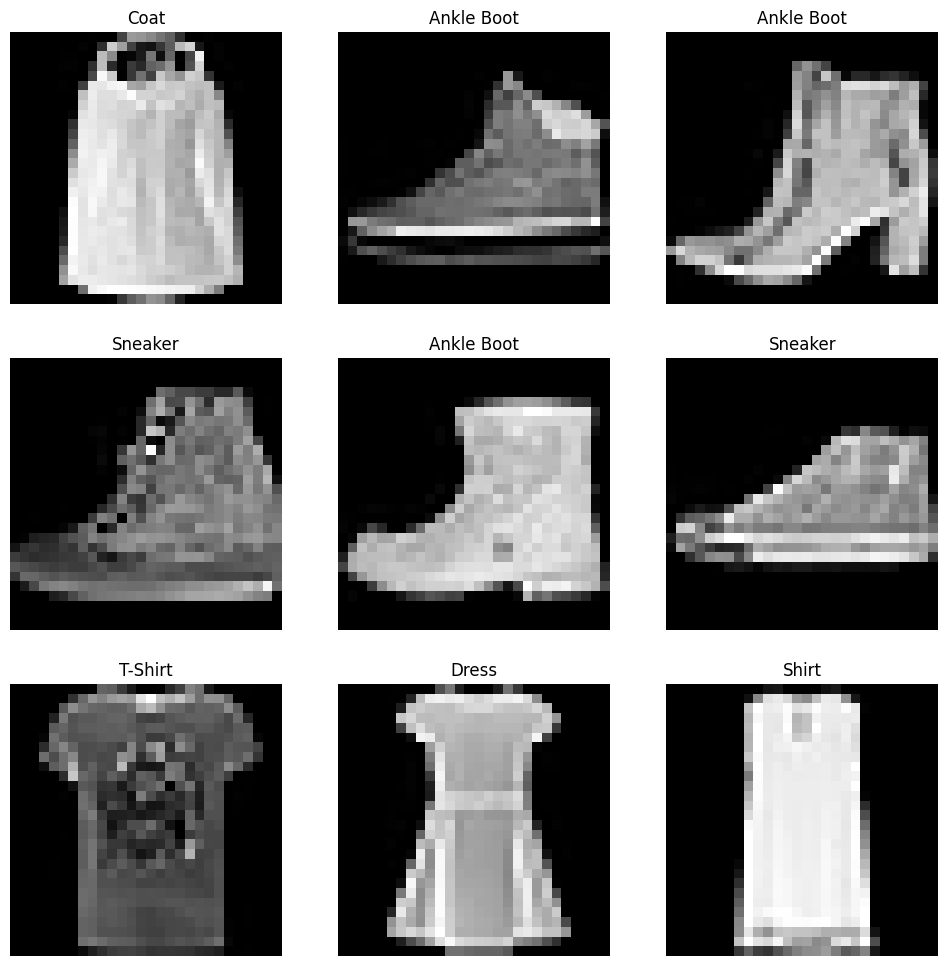

In [170]:
figure = plt.figure(figsize=(12, 12))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1, )).item()
    img, label = training_data[sample_idx]

    figure.add_subplot(rows, cols, i)

    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

## Custom Datasets

A custom dataset must implement 3 functions:
- __init__
- __len__
- __getitem__

Their labels are also stored separately in a CSV file

In [172]:
class CustomImageDataset(Dataset): # Extends Dataset class
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        """
        Runs a single time when instantiating the Dataset object.

        Initializes the following:
            - Directory containing the images (img_dir)
            - Image labels using the annotations_file (img_labels)
            - Both transform and target transform
        """
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        """
        Returns the number of samples in our dataset
        """
        return len(self.img_labels)

    def __getitem__(self, idx):
        """
        Loads and returns a sample from the dataset at a given index.

        Based on the given index, it:
            - Identifies the image's location on disk
            - Converts the image to a tensor using decode_image
            - Retrieves the corresponding label from the CSV data
            - Calls the transform functions on them (if specified)
        
        Finally it returns the tensor image and its corresponding label
        """
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        
        if self.target_transform:
            label = self.target_transform(label)
        
        return image, label

## Preparing data for training

`Dataset` retrieves our dataset's features and labels one sample at a time.

While training we want to:
    - Pass samples in "minibatches",
    - Reshuffle data at every epoch to reduce model overfitting
    - Use Python's `multiprocessing` module to speed up data retrieval
    etc.

DataLoader is an iterable that abstracts this complexity into an API

In [176]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [177]:
train_dataloader

### Iterating through the DataLoader

In [178]:
train_features, train_labels = next(iter(train_dataloader))

In [179]:
train_features

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [180]:
train_features.shape

torch.Size([64, 1, 28, 28])

Notice that the size of the first batch of our training features data matches the batch_size we provided.

And since we specified shuffle=True, after we iterate over all batches the data is shuffled.

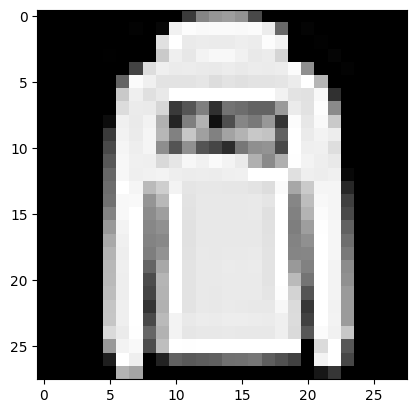

Label: Pullover


In [188]:
img = train_features[0].squeeze() # .squeeze() returns a tensor with all specified dimensoins of input of size 1 removed (check below)
label = train_labels[0].item() # Our label in this case is a single-element tensor, so we use .item() to convert it into a Python numerical value

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label]}")

In [189]:
train_features[0].shape

torch.Size([1, 28, 28])

In [190]:
train_features[0].squeeze().shape

torch.Size([28, 28])